**TP : Étapes de Construction d'un CNN**

**Objectifs**:

    

1.   Comprendre le fonctionnement des convolutions, max pooling et des fonctions  d'activation.
2.   Implémenter ces concepts de manière pratique.
3.     Construire un réseau de neurones convolutif (CNN) étape par étape et l'appliquer sur un jeu de données simple.


    


**Étape 1 : Compréhension de la Convolution 2D**



1.       Commencez par expliquer la convolution en appliquant un filtre (par exemple, 3x3) sur une image en utilisant NumPy.
2.      Objectif : Observer comment un filtre appliqué à une image change celle-ci (par exemple, détecter les bords).






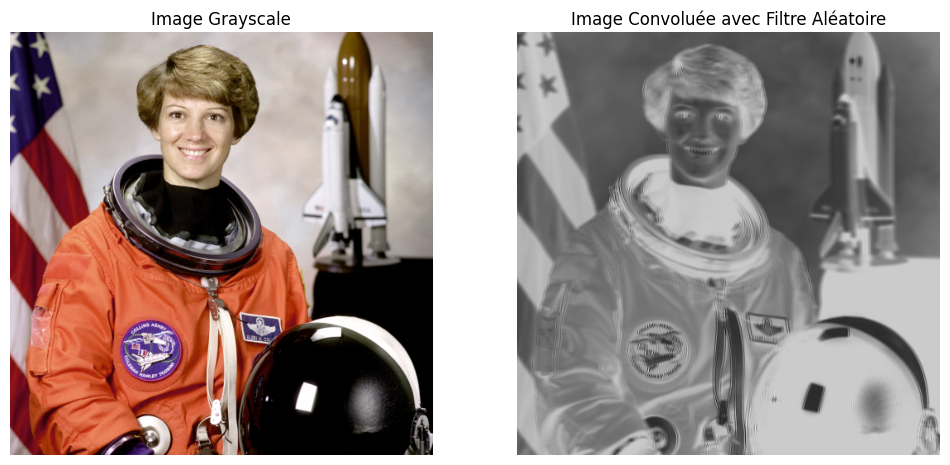

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

image = data.astronaut()
image_gray = color.rgb2gray(image)

kernel = np.array([[-1, 1, -1],
                          [-1, 1, -1],
                          [-1, 1, -1]])
def convolve2d(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    output = np.zeros((output_height, output_width))
    for i in range(output_height):
        for j in range(output_width):
            region = image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

convolved_image = convolve2d(image_gray, kernel)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Image Convoluée avec Filtre Aléatoire')
plt.axis('off')

plt.show()

**Étape 2 : Max Pooling**


1.   Implémentez une couche de max pooling pour réduire la dimension de l'image tout en conservant les caractéristiques importantes.




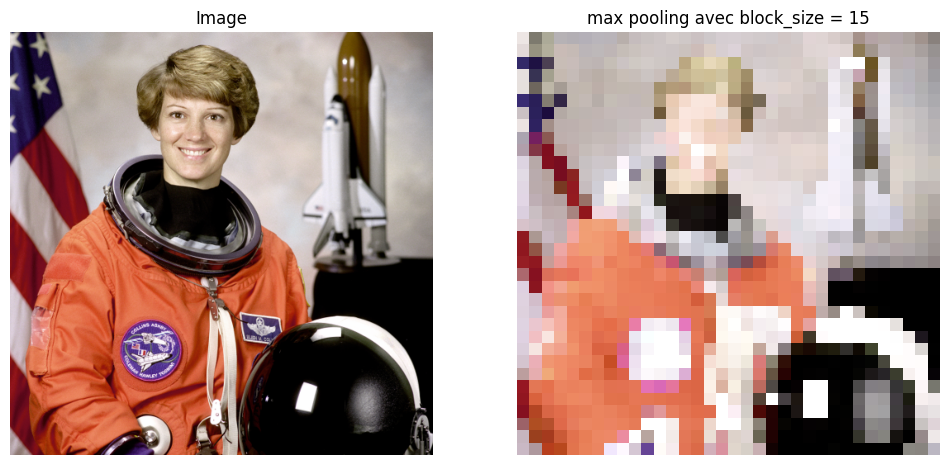

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

image = data.astronaut()

def max_pool_2D(image, block_size):
    image_height, image_width, image_depth = image.shape
    output_height = image_height // block_size
    output_width = image_width // block_size
    
    output = np.zeros((output_height, output_width, image_depth), dtype=image.dtype)
    for i in range(output_height):
        for j in range(output_width):
            for k in range(image_depth):
                block = image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size, k]
                output[i, j, k] = np.max(block)
    
    return output
block_size = 15
max_pool_image = max_pool_2D(image, block_size)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(max_pool_image, cmap='gray')
plt.title('max pooling avec block_size = ' + str(block_size))
plt.axis('off')

plt.show()



Étape 3 : Fonction d'Activation

1. Implémentez des fonctions d'activation, comme ReLU (Rectified Linear Unit).



In [37]:
def ReLU(x):
    return max(0, x)

**Étape 4 : Construire un CNN avec Keras**

1. Utilisez les concepts précédents pour construire un CNN simple qui classifie les images du dataset MNIST (chiffres manuscrits).

In [2]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1311 - accuracy: 0.9593 - val_loss: 0.0484 - val_accuracy: 0.9847
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0309 - val_accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.0363 - val_accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.0396 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 0.0414 -

**Étape 5 : Évaluation du Modèle**

1. Évaluer la performance du modèle sur le jeu de données de test.

In [3]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Précision: {test_accuracy:.4f}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0424 - accuracy: 0.9890
Précision: 0.9890


**Étape 6 : Visualisation des Prédictions**

1. Choisissez quelques exemples du jeu de données de test et affichez l'image, la prédiction du modèle et le label réel.

313/313 [==============================] - 2s 6ms/step


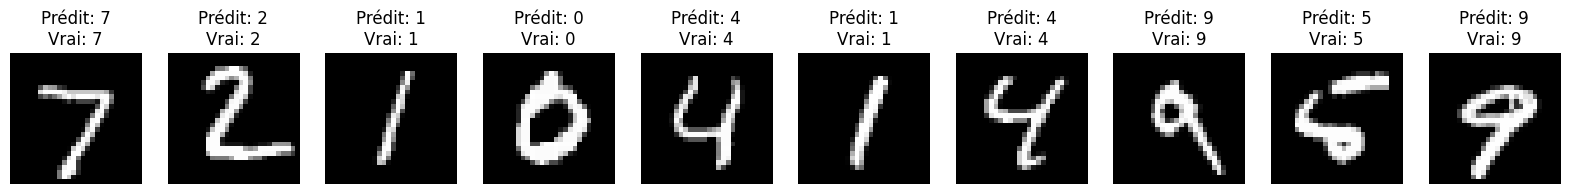

In [7]:
from matplotlib import pyplot as plt
import numpy as np
predictions = model.predict(X_test)
def plot_images_with_predictions(images, predictions, true_labels, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Prédit: {np.argmax(predictions[i])}\nVrai: {np.argmax(true_labels[i])}')
        plt.axis('off')
    plt.show()

plot_images_with_predictions(X_test, predictions, y_test, num_images=10)


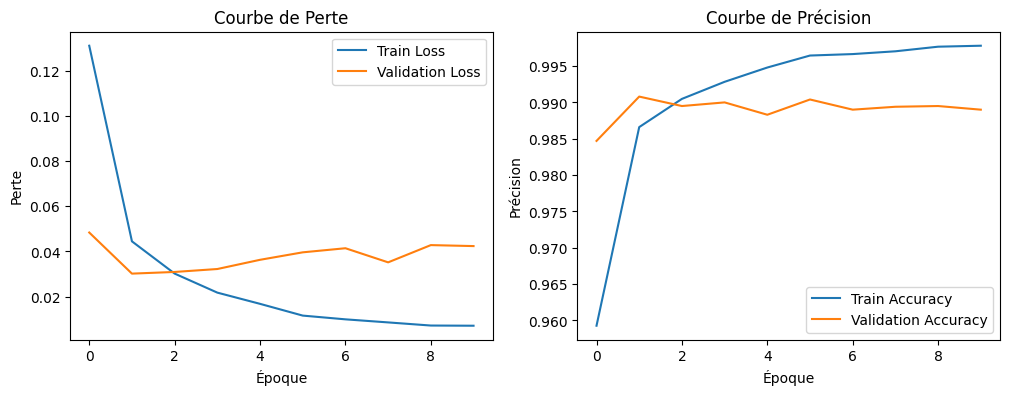

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de Perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de Précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.show()